## Fasion Classification

The aim is to correctly identify fasion class using CNN from a MNIST dataset of tens of thousands of images.

---

In [1]:
# Import libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
# Import datasets

fashion_train_df = pd.read_csv('~/Documents/GitHub/real-application/data/mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('~/Documents/GitHub/real-application/data/mnist_test.csv', sep = ',')

# STEP #3: DATA VISUALIZATION

In [3]:
# Training dataset 
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Training dataset shape

fashion_train_df.shape

(60000, 785)

In [5]:
# Training and testing arrays

training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [6]:
# Training array

training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

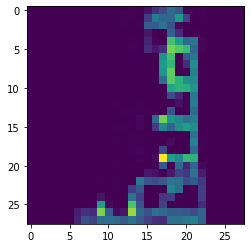

In [7]:
# Random picture review in color

i = random.randint(1,60000)
plt.imshow( training[i,1:].reshape((28,28)) ); # reshape and plot the image

# Dataset contains 10 classes decoded is as follows:

# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

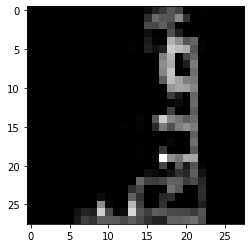

In [8]:
# Random picture review in gray color 

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray'); 

In [9]:
# Label name for a randomly selected picture class

label = training[i,0]
label

5.0

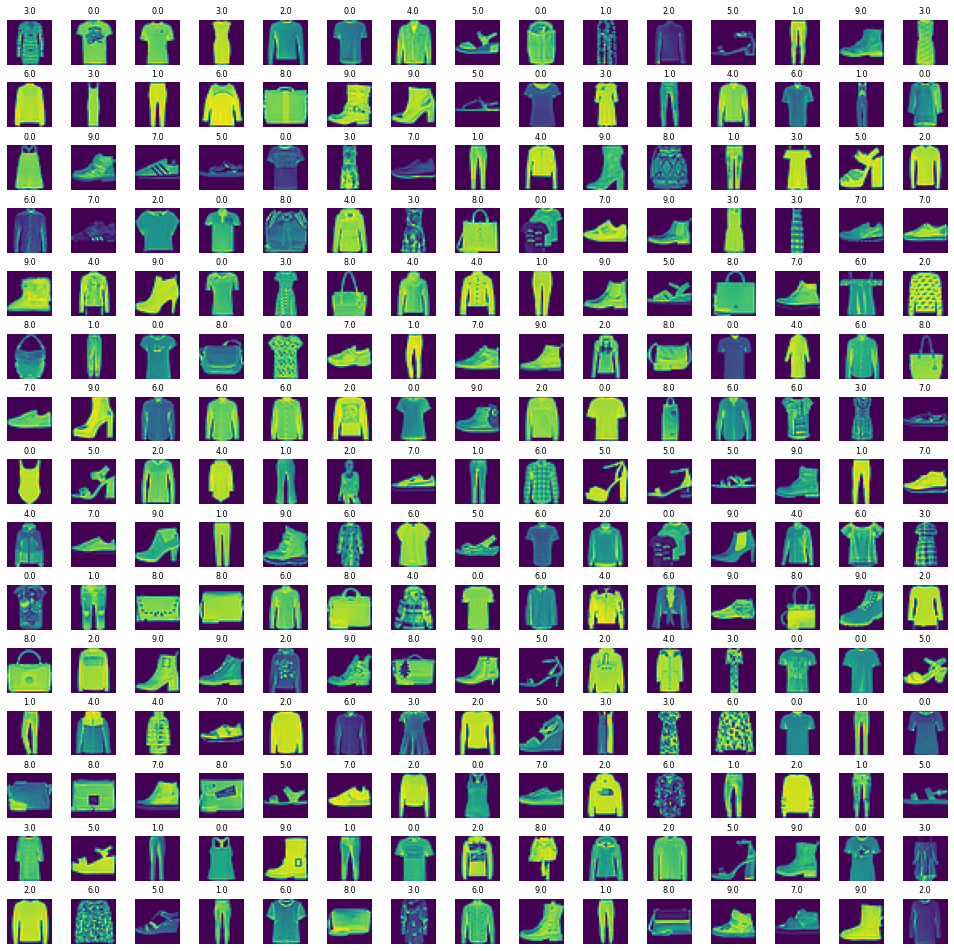

In [10]:
# More images in a grid format


# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_training = len(training) 

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
   
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [11]:
# Prepare the training and testing dataset 

X_train = training[:,1:]/255
y_train = training[:,0]

print(X_train.shape)
print(y_train.shape)

X_test = testing[:,1:]/255
y_test = testing[:,0]

(60000, 784)
(60000,)


In [12]:
# Reshape X_train & test 

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
# Build the CNN model

from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [14]:
# Compile the CNN model 

cnn.compile(loss ='sparse_categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [15]:
# Train the CNN model 

epochs = 30

history = cnn.fit(X_train,
                  y_train,
                  batch_size = 512,
                  epochs = epochs,
                  verbose = 1)


Epoch 1/30
118/118 [==============================] - 27s 226ms/step - loss: 0.8773 - accuracy: 0.6816
Epoch 2/30
118/118 [==============================] - 28s 239ms/step - loss: 0.4948 - accuracy: 0.8210
Epoch 3/30
118/118 [==============================] - 28s 238ms/step - loss: 0.4189 - accuracy: 0.8511
Epoch 4/30
118/118 [==============================] - 29s 244ms/step - loss: 0.3788 - accuracy: 0.8637
Epoch 5/30
118/118 [==============================] - 32s 270ms/step - loss: 0.3488 - accuracy: 0.8751
Epoch 6/30
118/118 [==============================] - 30s 257ms/step - loss: 0.3281 - accuracy: 0.8814
Epoch 7/30
118/118 [==============================] - 34s 290ms/step - loss: 0.3117 - accuracy: 0.8872
Epoch 8/30
118/118 [==============================] - 36s 309ms/step - loss: 0.3045 - accuracy: 0.8903
Epoch 9/30
118/118 [==============================] - 33s 277ms/step - loss: 0.2917 - accuracy: 0.8947
Epoch 10/30
118/118 [==============================] - 33s 276ms/step - l

In [16]:
# Evaluate the CNN model 

evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.2511 - accuracy: 0.9121
Test Accuracy : 0.912


In [17]:
# Get the predictions for the test data

predicted_classes = cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


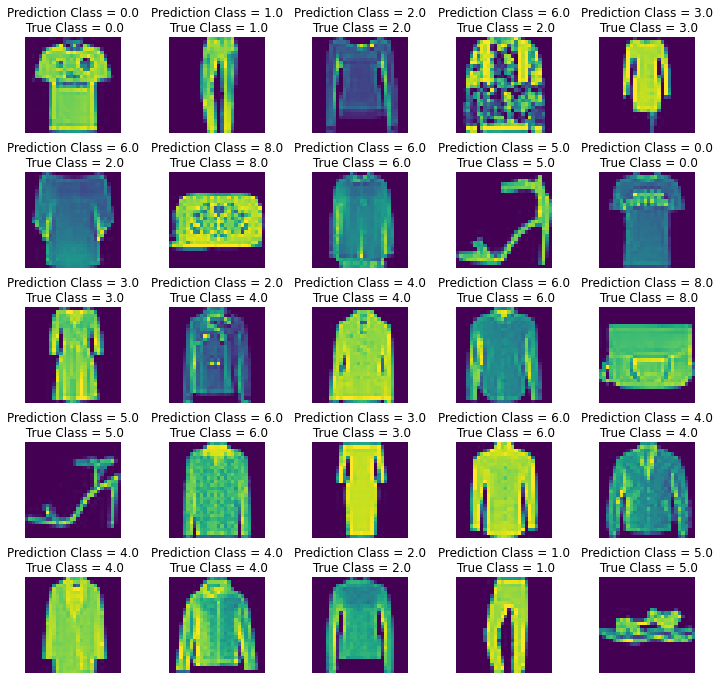

In [18]:
# Plot the results 

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

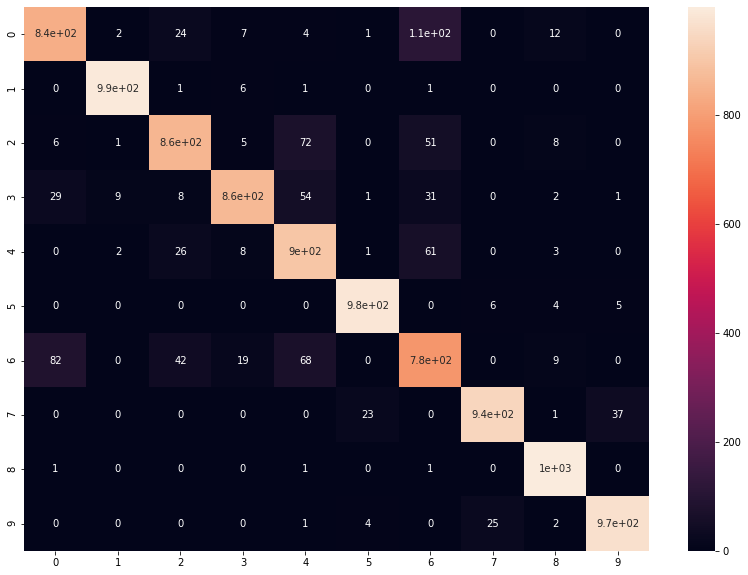

In [19]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [20]:
# Classification report 

from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.84      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.86      0.88      1000
     Class 3       0.95      0.86      0.91      1000
     Class 4       0.82      0.90      0.86      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.75      0.78      0.77      1000
     Class 7       0.97      0.94      0.95      1000
     Class 8       0.96      1.00      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

